In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [27]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [19]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    "xray_dataset_covid19/train",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 148 files belonging to 2 classes.


In [20]:
class_names = train.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [21]:
len(train)

5

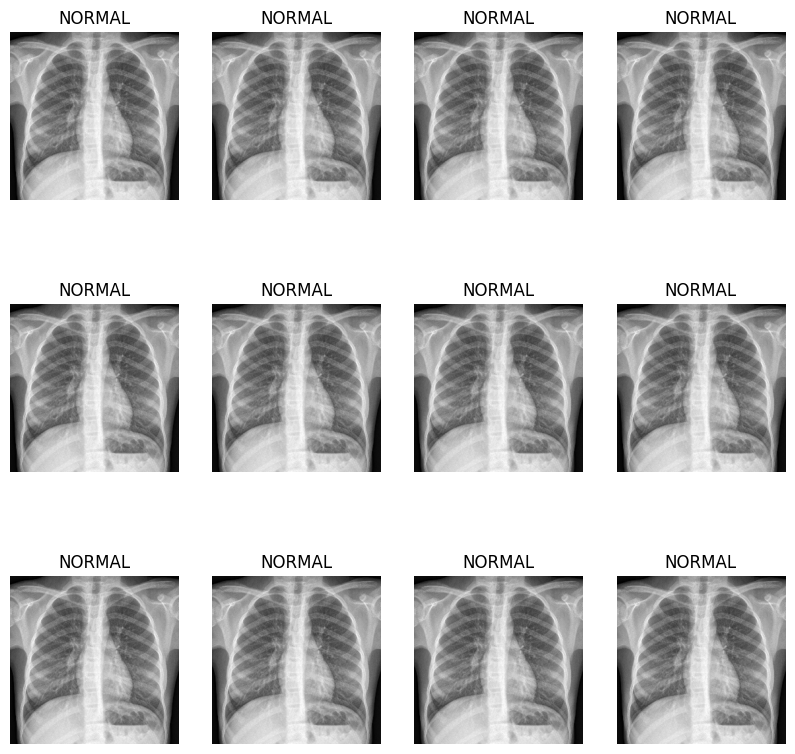

In [22]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [26]:
#no need of data augmentation

In [31]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2
model= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(4,4), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape = input_shape)

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 253, 253, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 126, 126, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 123, 123, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 61, 61, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 58, 58, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 29, 29, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 26, 26, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 13, 13, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 10, 10, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 2, 2, 64)              │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,090 (1.15 MB)

 Trainable params: 301,090 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
    optimizer ='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose = 1
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4981 - loss: 0.6988
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5334 - loss: 0.6889
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5749 - loss: 0.6891
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5710 - loss: 0.6920
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5048 - loss: 0.6896
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5226 - loss: 0.6825
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6712 - loss: 0.6640
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8265 - loss: 0.5808
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7027 - loss: 0.5709
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6840 - loss: 0.5962
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5907 - loss: 0.5773
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9223 - loss: 0.4716
Epoch 13/50
5/5 ━━━━━━━

In [40]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "xray_dataset_covid19/test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 40 files belonging to 2 classes.


In [41]:
scores = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 1.0000 - loss: 0.0265


In [42]:
scores

[0.024779293686151505, 1.0]

In [43]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 5}

In [44]:
acc = history.history['accuracy']
loss = history.history['loss']

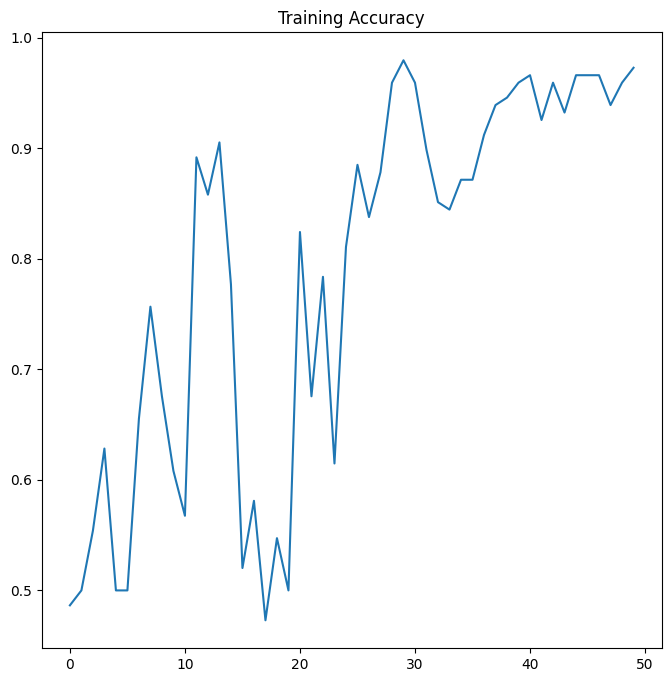

In [49]:
plt.figure(figsize=(8,8))
plt.plot(range(50), acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.show()

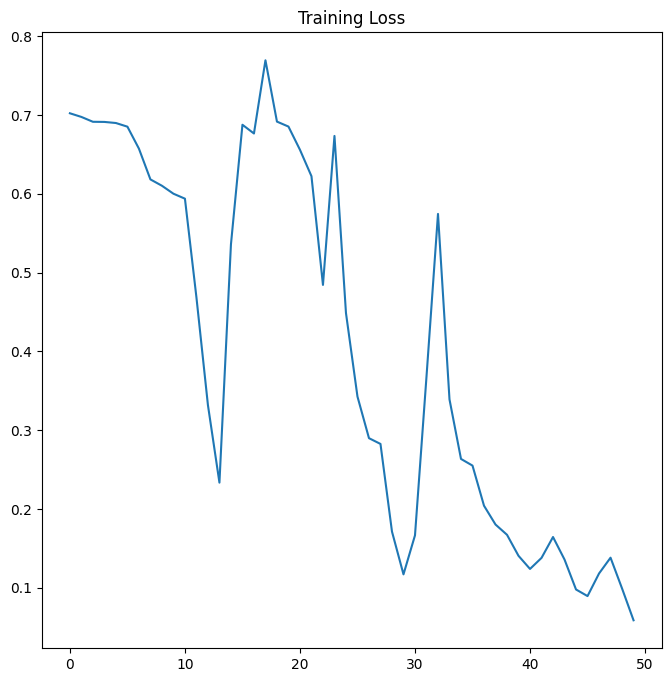

In [50]:
plt.figure(figsize=(8,8))
plt.plot(range(50), loss, label='Training loss')
plt.title('Training Loss')
plt.show()